In [2]:
import pytesseract as pt
import pandas as pd

from PIL import Image

image_path = r"C:\Users\Debajyoti\OneDrive\Desktop\Project 2\Selected\000.jpeg"

img_pl = Image.open(image_path)
text = pt.image_to_string(img_pl)
print(text)

data = pt.image_to_data(img_pl)
dataList = list(map(lambda x:x.split('\t'),data.split('\n')))

df = pd.DataFrame(dataList[1:],columns = dataList[0])



 

\. 040-4852 8881, 90309 52549
Fi /laurelsoverseaseducation

“@: LAURELS

OVERSEAS EDUCATIONAL CONSULTANCY PVT. LTD.

er, Sea
| "dims
U.K

AUSTRALIA CANADA IRELAND

 

      

 

 

©) www.laurelseducation.com )%info@laurelseducation.com

 



In [5]:
df.dtypes

level        object
page_num     object
block_num    object
par_num      object
line_num     object
word_num     object
left         object
top          object
width        object
height       object
conf         object
text         object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73 entries, 0 to 72
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   level      73 non-null     object
 1   page_num   73 non-null     object
 2   block_num  73 non-null     object
 3   par_num    73 non-null     object
 4   line_num   73 non-null     object
 5   word_num   73 non-null     object
 6   left       73 non-null     object
 7   top        73 non-null     object
 8   width      73 non-null     object
 9   height     73 non-null     object
 10  conf       73 non-null     object
 11  text       73 non-null     object
dtypes: object(12)
memory usage: 7.4+ KB


In [8]:
df.dropna(inplace = True)
col_int = ['level','page_num','block_num','par_num','line_num','word_num','left','top','width','height','conf']
df[col_int] = df[col_int].astype(float).astype(int)

In [9]:
df.dtypes

level         int32
page_num      int32
block_num     int32
par_num       int32
line_num      int32
word_num      int32
left          int32
top           int32
width         int32
height        int32
conf          int32
text         object
dtype: object

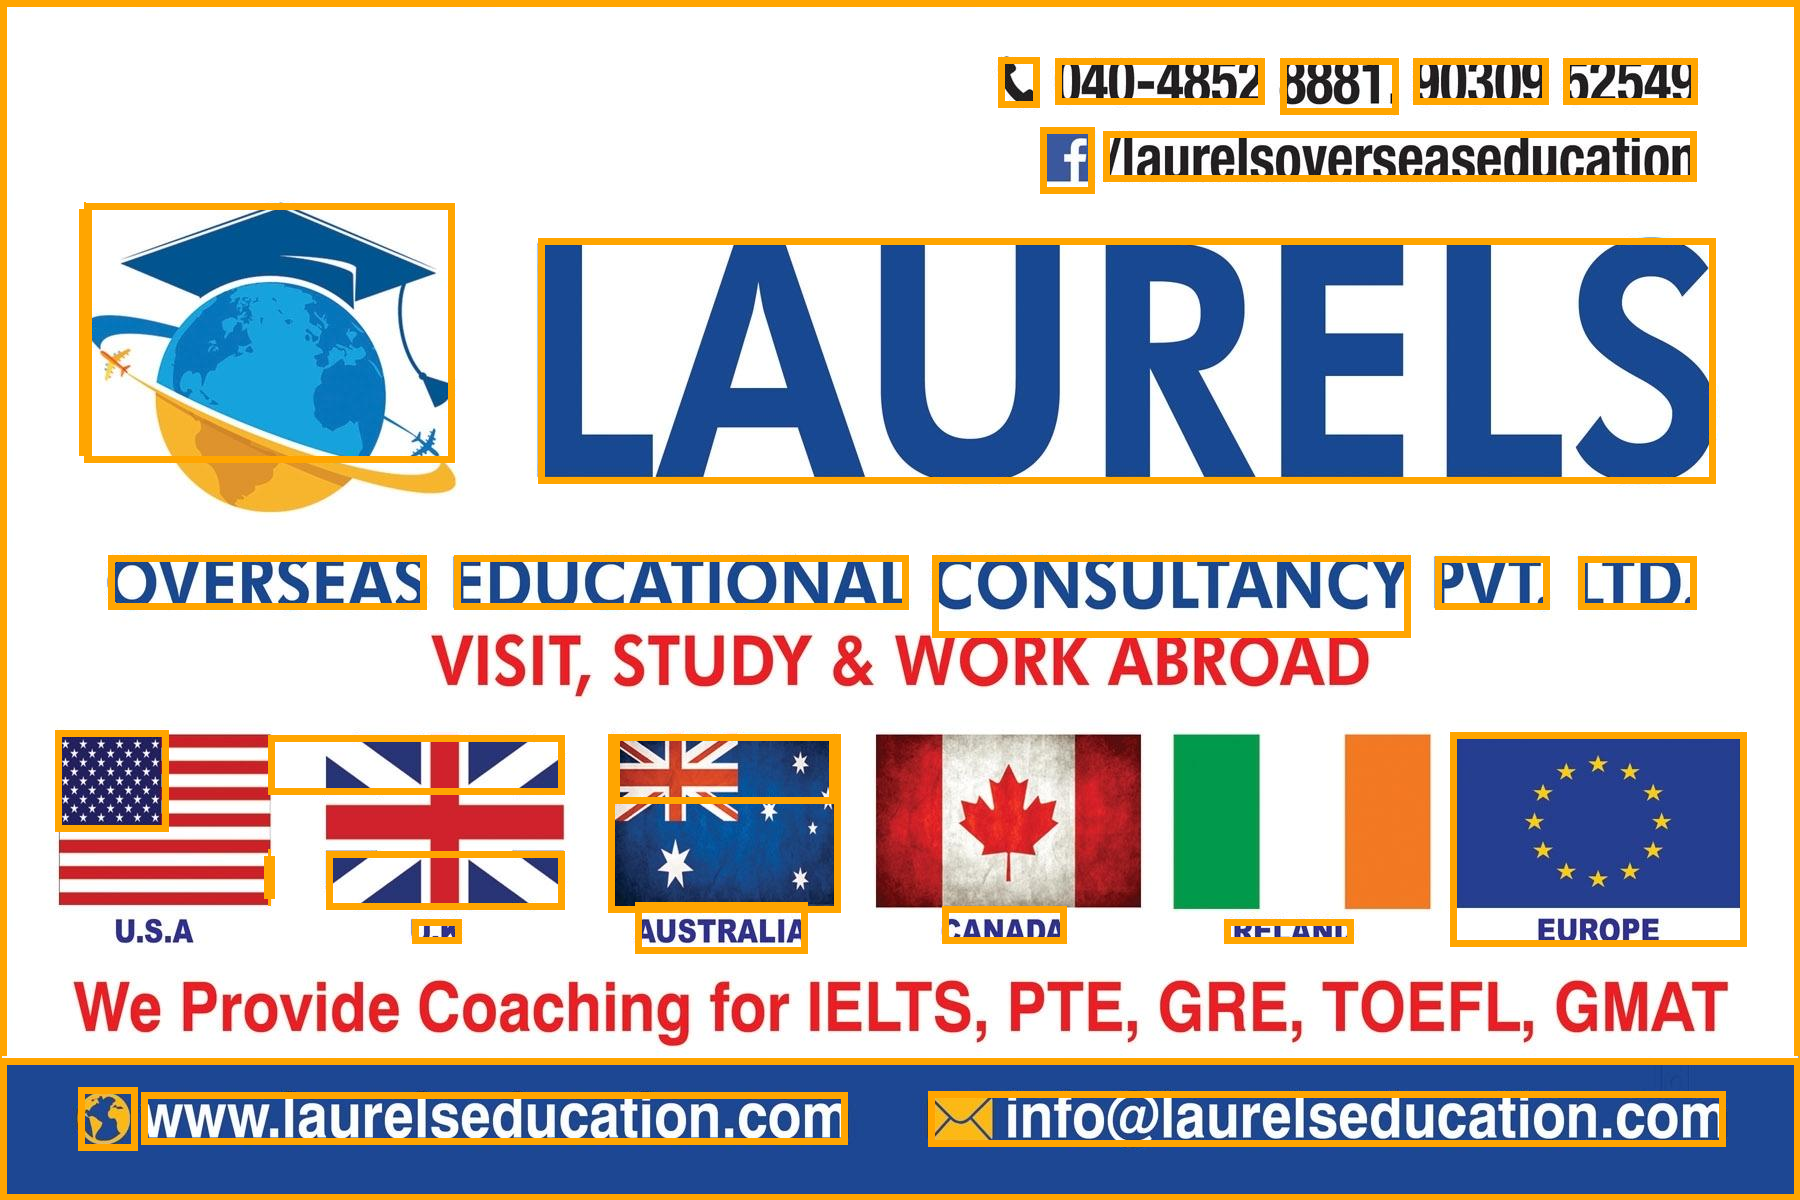

In [ ]:
from PIL import ImageDraw

image = img_pl.copy()
draw = ImageDraw.Draw(image)

level = 'word'  # Change this to 'block', 'para', etc. as needed

for l, x, y, w, h, c in df[['level', 'left', 'top', 'width', 'height', 'conf']].values:
    if level == 'page' and l == 1:
        draw.rectangle([x, y, x + w, y + h], outline='green', width=7)

    elif level == 'block' and l == 2:
        draw.rectangle([x, y, x + w, y + h], outline='red', width=7)

    elif level == 'para' and l == 3:
        draw.rectangle([x, y, x + w, y + h], outline='yellow', width=7)  # Fixed spelling

    elif level == 'line' and l == 4:
        draw.rectangle([x, y, x + w, y + h], outline='blue', width=7)

    elif level == 'word' and l == 5:
        draw.rectangle([x, y, x + w, y + h], outline='orange', width=7)
    

image
